In [115]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [116]:
def wrangle(filepath):
    # Read CSV into df
    df = pd.read_csv(filepath)

    #Subset to Properties in Capital Federal & Apartment & Price > 400000
    filter_df =  df[(df["place_with_parent_names"].str.contains("Capital Federal")) & 
            (df["property_type"] == "apartment") &
            (df["price_aprox_usd"] < 400_000)]
    
    low, high = filter_df["surface_covered_in_m2"].quantile([0.1, 0.9])
    remove_outliers_df = filter_df[filter_df["surface_covered_in_m2"].between(low, high)]
    
    return remove_outliers_df


In [117]:
df = wrangle("data/buenos-aires-real-estate-1.csv")

print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


Text(0.5, 1.0, 'Distribution of Appartment Sizes')

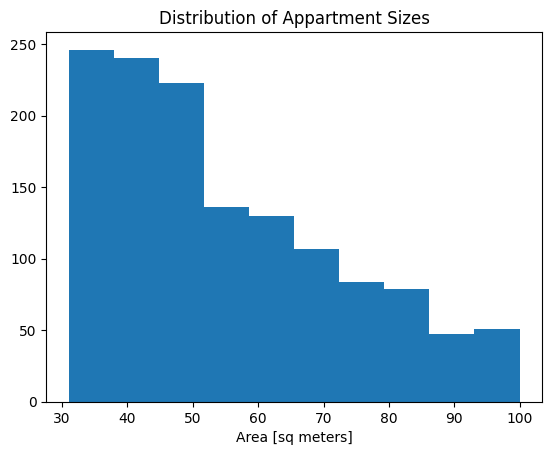

In [118]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Appartment Sizes")

In [119]:
df.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.343000e+03,1.343000e+03,1343.000000,965.000000,1343.000000,927.000000,1343.000000,379.000000,1078.000000,349.000000
mean,2.204582e+05,2.054927e+06,135527.838719,59.883938,55.076694,2244.163063,4285.479770,11.155673,2.364564,1923.163324
std,4.151182e+05,9.033095e+05,59575.630208,26.621969,18.160427,639.740608,7987.685558,50.138692,0.902759,1224.444180
min,2.727900e+04,4.136151e+05,27279.000000,0.000000,31.000000,513.513514,808.148936,1.000000,1.000000,1.000000
25%,9.325000e+04,1.394941e+06,92000.000000,42.000000,40.000000,1826.505017,1975.872093,2.000000,2.000000,1100.000000
50%,1.259000e+05,1.819935e+06,120029.460000,55.000000,50.000000,2141.519231,2411.764706,4.000000,2.000000,1670.000000
75%,1.750000e+05,2.425984e+06,160000.000000,75.000000,68.500000,2578.183144,2964.814815,7.000000,3.000000,2500.000000
max,5.487000e+06,5.989148e+06,395000.000000,229.000000,100.000000,5777.777778,57156.250000,616.000000,6.000000,7456.000000


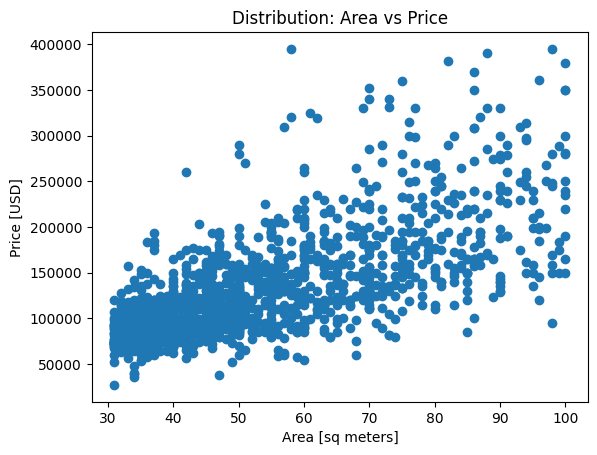

In [122]:
plt.scatter(df["surface_covered_in_m2"], df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("distribution: Area vs Price");